# Assignment 1

Deadline: 19.03.2025, 12:00 CET

<Add your name, student-id and emal address>

In [25]:
# Import standard libraries
import os
import sys
import timeit # To compute runtimes
from typing import Optional

# Import third-party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import qpsolvers

# Import local modules
project_root = os.path.dirname(os.path.dirname(os.getcwd()))   # Change this path if needed
src_path = os.path.join(project_root, 'qpmwp-course', 'src')
sys.path.append(project_root)
sys.path.append(src_path)
from estimation.covariance import Covariance
from estimation.expected_return import ExpectedReturn
from optimization.constraints import Constraints
from optimization.optimization import Optimization, Objective
from optimization.optimization_data import OptimizationData
from optimization.quadratic_program import QuadraticProgram, USABLE_SOLVERS

## 1. Solver Horse Race

### 1.a)
(3 points)

Generate a Multivariate-Normal random dataset of dimension TxN, T=1000, N=100, and compute a vector of expected returns, q, and a covariance matrix, P, using classes ExpectedReturn and Covariance respectively.

In [26]:

# Set the dimensions
T = 1000  # Number of time periods
N = 100   # Number of assets

# Generate a random mean vector and covariance matrix for the multivariate normal distribution
mean = np.ones(N)
cov = np.eye(N)

# Generate the Multivariate-Normal random dataset
data = np.random.multivariate_normal(mean, cov, size= T)

# Convert the dataset to a DataFrame for easier manipulation
df = pd.DataFrame(data, columns=[f'Asset_{i+1}' for i in range(N)])

# Compute the vector of expected returns (mean returns) from df
mu = ExpectedReturn()
q = mu.estimate(df, inplace=False)

# Compute the covariance matrix from df
cov_instance = Covariance()
P = cov_instance.estimate(df, inplace=False)

# Display the results
print("Vector of expected returns (q):")
print(q)

print("\nCovariance matrix (P):")
print(P)

Vector of expected returns (q):
Asset_1      0.803623
Asset_2      0.712513
Asset_3      0.774782
Asset_4      0.783353
Asset_5      0.817804
               ...   
Asset_96     0.780505
Asset_97     0.690890
Asset_98     0.796057
Asset_99     0.757103
Asset_100    0.757881
Length: 100, dtype: float64

Covariance matrix (P):
            Asset_1   Asset_2   Asset_3   Asset_4   Asset_5   Asset_6  \
Asset_1    0.948801  0.059453 -0.010897 -0.031143 -0.018074 -0.012469   
Asset_2    0.059453  1.041357  0.049349  0.011691  0.016292  0.040611   
Asset_3   -0.010897  0.049349  0.948412 -0.033960  0.022061 -0.029343   
Asset_4   -0.031143  0.011691 -0.033960  0.886234  0.041561  0.025113   
Asset_5   -0.018074  0.016292  0.022061  0.041561  1.035410  0.028357   
...             ...       ...       ...       ...       ...       ...   
Asset_96   0.039020  0.008035  0.011630 -0.023558  0.005256 -0.010677   
Asset_97  -0.039266 -0.000150 -0.001533  0.001808 -0.010482 -0.011585   
Asset_98   0.0440

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [27]:
G1 = pd.Series([1] * 30 + [0] * 70, index=df.columns)
G1[:31]


Asset_1     1
Asset_2     1
Asset_3     1
Asset_4     1
Asset_5     1
Asset_6     1
Asset_7     1
Asset_8     1
Asset_9     1
Asset_10    1
Asset_11    1
Asset_12    1
Asset_13    1
Asset_14    1
Asset_15    1
Asset_16    1
Asset_17    1
Asset_18    1
Asset_19    1
Asset_20    1
Asset_21    1
Asset_22    1
Asset_23    1
Asset_24    1
Asset_25    1
Asset_26    1
Asset_27    1
Asset_28    1
Asset_29    1
Asset_30    1
Asset_31    0
dtype: int64

### 1.b)
(3 points)

Instantiate a constraints object by injecting column names of the data created in 1.a) as ids and add:
- a budget constaint (i.e., asset weights have to sum to one)
- lower bounds of 0.0 for all assets
- upper bounds of 0.2 for all assets
- group contraints such that the sum of the weights of the first 30 assets is <= 0.3, the sum of assets 31 to 60 is <= 0.4 and the sum of assets 61 to 100 is <= 0.5

In [28]:
# Instantiate the Constraints class
constraints = Constraints(ids = df.columns.tolist())

# Add budget constraint
constraints.add_budget(rhs=1, sense='=')

# Add box constraints (i.e., lower and upper bounds)
constraints.add_box(lower = 0.0, upper = 0.2)

# Add linear constraints
G = pd.DataFrame(np.zeros((3, N)), columns=constraints.ids)
G.iloc[0, 0:30] = 1
G.iloc[1, 30:60] = 1
G.iloc[2, 60:100] = 1

h = pd.Series([0.3, 0.4, 0.5])

constraints.add_linear(G = G, sense = '<=', rhs = h)

### 1.c) 
(4 points)

Solve a Mean-Variance optimization problem (using coefficients P and q in the objective function) which satisfies the above defined constraints.
Repeat the task for all open-source solvers in qpsolvers and compare the results in terms of:

- runtime
- accuracy: value of the primal problem.
- reliability: are all constarints fulfilled? Extract primal resisduals, dual residuals and duality gap.

Generate a DataFrame with the solvers as column names and the following row index: 'solution_found': bool, 'objective': float, 'primal_residual': float, 'dual_residual': float, 'duality_gap': float, 'runtime': float.

Put NA's for solvers that failed for some reason (e.g., unable to install the package or solvers throws an error during execution). 




In [29]:
pip install qpsolvers[daqp] qpsolvers[quadprog] qpsolvers[osqp] qpsolvers[highs] qpsolvers[qpalm] qpsolvers[cvxopt]


^C
object address  : 0x107511ae0
object refcount : 3
object type     : 0x105c898f0
object type name: KeyboardInterrupt
object repr     : KeyboardInterrupt()
lost sys.stderr
Note: you may need to restart the kernel to use updated packages.


In [ ]:
print(USABLE_SOLVERS)

{'cvxopt', 'highs', 'quadprog', 'qpalm', 'daqp', 'osqp'}


In [ ]:
# Extract the constraints in the format required by the solver
GhAb = constraints.to_GhAb()

# Loop over solvers, instantiate the quadratic program, solve it and store the results
solvers = ['daqp', 'quadprog', 'cvxopt', 'osqp', 'highs', 'qpalm']

# Initialize the DataFrame with the correct structure
# Rows are metrics, columns are solvers
index = ['solution_found', 'objective', 'primal_residual', 'dual_residual', 'duality_gap', 'runtime']
df_results = pd.DataFrame(index=index, columns=solvers)

for k in USABLE_SOLVERS:
    qp = QuadraticProgram(P.to_numpy(), 
                        q.to_numpy() * -1, 
                        G = GhAb['G'],
                        h = GhAb['h'],
                        A = GhAb['A'],
                        b = GhAb['b'],
                        lb = constraints.box['lower'].to_numpy(),
                        ub = constraints.box['upper'].to_numpy(),
                        solver = k)
    qp.solve()
    runtime = timeit.timeit(lambda: qp.solve(), number=1)
    solution = qp.results['solution']

    if qp.is_feasible() == True:
        df_results.at['solution_found', k] = True
        df_results.at['runtime', k] = runtime
        df_results.at['objective', k] = qp.objective_value()
        df_results.at['primal_residual', k] = round(solution.primal_residual(),6)
        df_results.at['dual_residual', k] = round(solution.dual_residual(),6)
        df_results.at['duality_gap', k] = solution.duality_gap()
    else:
        df_results.at['solution_found', k] = False


Print and visualize the results

In [ ]:
df_results

,daqp,quadprog,cvxopt,osqp,highs,qpalm
solution_found,True,True,True,True,True,True
objective,-0.79917,-0.79917,-0.79917,-0.800011,-0.79917,-0.799192
primal_residual,0.0,0.0,0.0,0.000663,0.0,0.000075
dual_residual,0.0,0.0,0.0,0.000005,0.0,0.0
duality_gap,1.4654943925052066e-14,1.9761969838327786e-14,6.141388178004803e-07,0.0008229972171580613,4.331248693034695e-09,2.1283287456208555e-05
runtime,0.000879,0.002718,0.020988,0.003204,0.004472,0.004514


In [ ]:
# Extract the constraints in the format required by the solver
GhAb = constraints.to_GhAb()

# Get the list of solvers
solvers = list(USABLE_SOLVERS)

# Initialize results DataFrame
results = pd.DataFrame(index=['solution_found', 'objective', 'primal_residual', 'dual_residual', 'duality_gap', 'runtime'], columns=solvers)

for solver in solvers:
    try:
        start_time = timeit.default_timer()
        # solution = qpsolvers.solve_problem(
        #     problem=problem,
        #     solver='osqp',
        #     initvals=None,
        #     verbose=False,
        # )
        qp = QuadraticProgram(
            P=P.to_numpy(),
            q=q.to_numpy() * -1,
            G = GhAb['G'],
            h = GhAb['h'],
            A = GhAb['A'],
            b = GhAb['b'],
            lb = constraints.box['lower'].to_numpy(),
            ub = constraints.box['upper'].to_numpy(),
            solver = solver,
        )
        qp.problem_data
        qp.is_feasible()
        qp.solve()
        qp.objective_value()
        solution = qp.results.get('solution')
        end_time = timeit.default_timer()

        results.loc[:, solver] = [
            solution.found, 
            # solution.obj, 
            qp.objective_value(),
            solution.primal_residual(), 
            solution.dual_residual(), 
            solution.duality_gap(), 
            end_time - start_time
        ]
    except Exception as e:
        # If solver fails, store NaNs
        results.loc[:, solver] = [False, np.nan, np.nan, np.nan, np.nan, np.nan]
        print(f"Solver {solver} failed: {e}")
# Display the final DataFrame
results

,cvxopt,highs,quadprog,qpalm,daqp,osqp
solution_found,True,True,True,True,True,True
objective,-0.79917,-0.79917,-0.79917,-0.799192,-0.79917,-0.800011
primal_residual,0.0,0.0,0.0,0.000075,0.0,0.000663
dual_residual,0.0,0.0,0.0,0.0,0.0,0.000005
duality_gap,[6.141388178004803e-07],[4.331248693034695e-09],[1.9761969838327786e-14],[2.1283287456208555e-05],[1.4654943925052066e-14],[0.0008229972171580613]
runtime,0.062014,0.028522,0.02637,0.028031,0.024732,0.026704


Percentage of missing values per metric:
cvxopt      0.166667
highs       0.166667
quadprog    0.166667
qpalm       0.166667
daqp        0.166667
osqp        0.166667
dtype: float64
                   cvxopt     highs quadprog     qpalm      daqp      osqp
solution_found       True      True     True      True      True      True
objective        -0.79917  -0.79917 -0.79917 -0.799192  -0.79917 -0.800011
primal_residual       0.0       0.0      0.0  0.000075       0.0  0.000663
dual_residual         0.0       0.0      0.0       0.0       0.0  0.000005
duality_gap           NaN       NaN      NaN       NaN       NaN       NaN
runtime          0.062014  0.028522  0.02637  0.028031  0.024732  0.026704


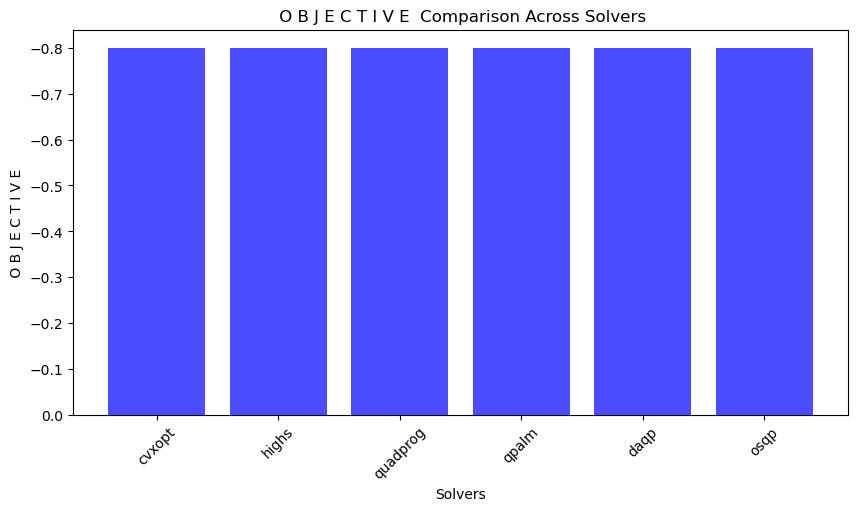

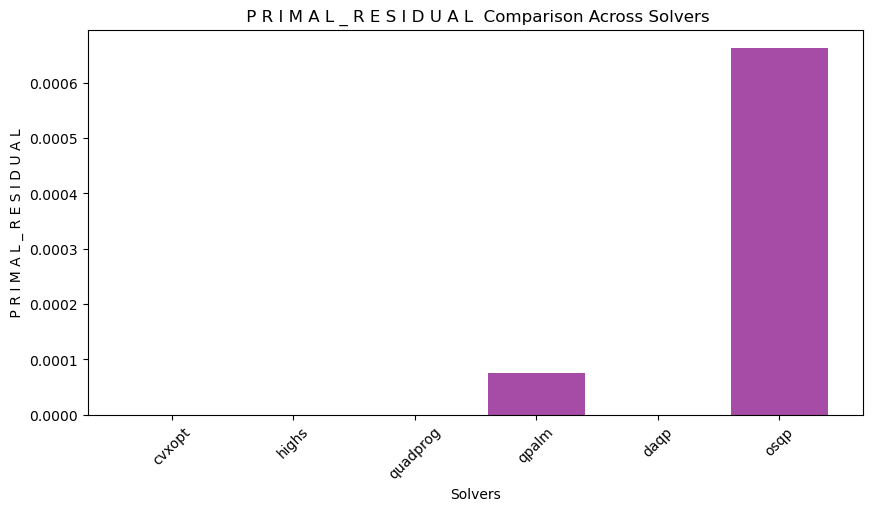

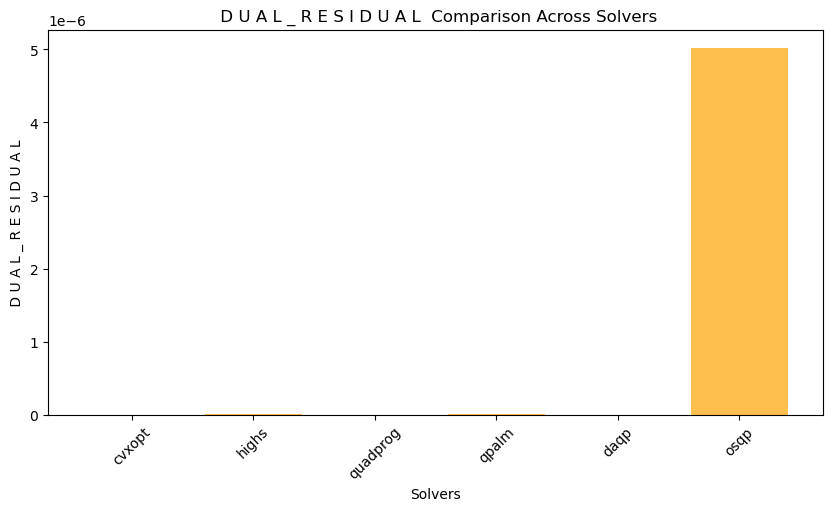

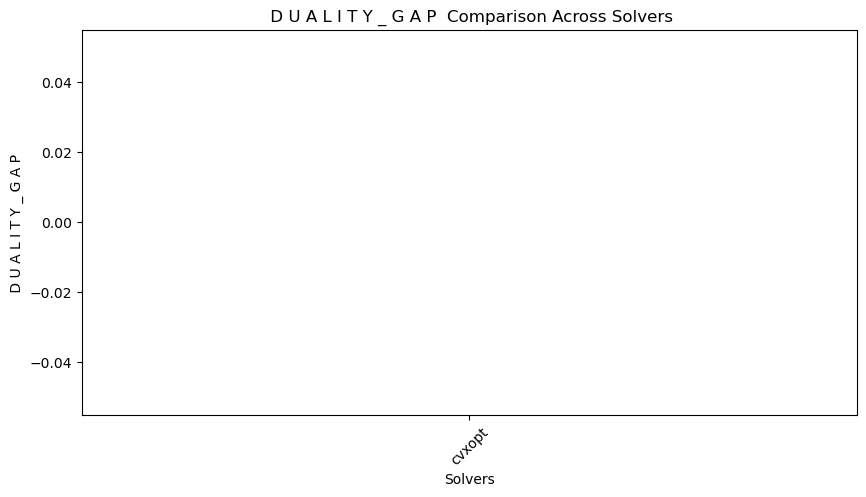

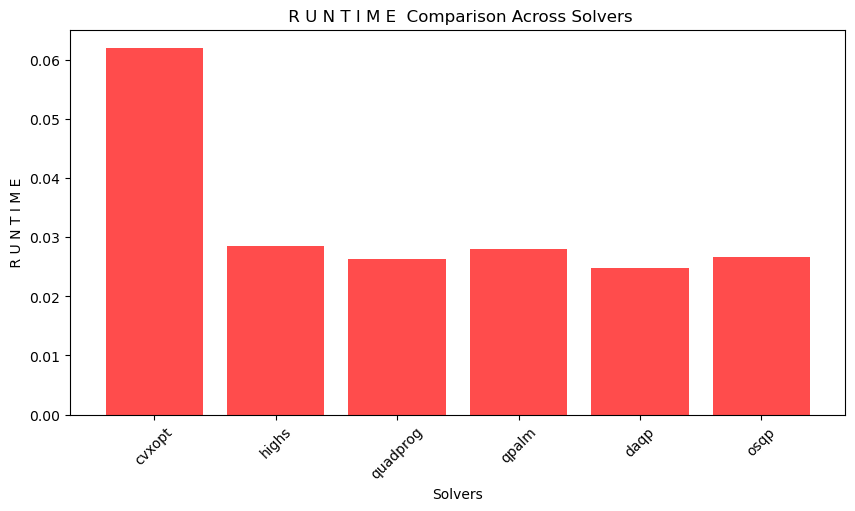

In [30]:
# Transpose results to make metrics as rows and solvers as columns
df_results = results.T  # Now solvers are rows, metrics are columns
df_results = df_results.apply(pd.to_numeric, errors='coerce')

# *FIX: Transpose again to make metrics rows and solvers columns*
df_results = df_results.T  

# Print percentage of missing values to debug NaNs
print("Percentage of missing values per metric:")
print(df_results.isna().sum() / len(df_results))

# Display the DataFrame
print(df_results)

# Function to visualize results as bar charts
def plot_bar_chart(metric_name, color, ylabel, title):
    if metric_name not in df_results.index:
        print(f"Skipping {metric_name}: Not found in DataFrame")
        return
    
    plt.figure(figsize=(10, 5))
    plt.bar(df_results.columns, df_results.loc[metric_name], color=color, alpha=0.7)

    # If values are negative, invert the Y-axis so bars extend downward
    if df_results.loc[metric_name].max() < 0:
        plt.gca().invert_yaxis()

    plt.xlabel("Solvers")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Generate bar charts for each metric
for metric, color in zip(["objective", "primal_residual", "dual_residual", "duality_gap", "runtime"], 
                          ["blue", "purple", "orange", "green", "red"]):
    plot_bar_chart(metric, color, metric.replace("", " ").title(), f"{metric.replace('', ' ').title()} Comparison Across Solvers")

In [34]:
solution

Solution(problem=<qpsolvers.problem.Problem object at 0x15d9d1220>, extras={'dual_inf_cert': array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None], dtype=object), 'info': <osqp.OSQP_info object at 0x15ef82fb0>, 'prim_inf_cert': array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       Non

## 2. Analytical Solution to Minimum-Variance Problem

(5 points)

- Create a `MinVariance` class that follows the structure of the `MeanVariance` class.
- Implement the `solve` method in `MinVariance` such that if `solver_name = 'analytical'`, the analytical solution is computed and stored within the object (if such a solution exists). If not, call the `solve` method from the parent class.
- Create a `Constraints` object by injecting the same ids as in part 1.b) and add a budget constraint.
- Instantiate a `MinVariance` object by setting `solver_name = 'analytical'` and passing instances of `Constraints` and `Covariance` as arguments.
- Create an `OptimizationData` object that contains an element `return_series`, which consists of the synthetic data generated in part 1.a).
- Solve the optimization problem using the created `MinVariance` object and compare the results to those obtained in part 1.c).


In [44]:
# Define class MinVariance
class MinVariance(Optimization):

    def __init__(self,
                 constraints: Constraints,
                 covariance: Optional[Covariance] = None,
                 **kwargs):
        super().__init__(
            constraints=constraints,
            **kwargs
        )
        self.covariance = Covariance() if covariance is None else covariance

    def set_objective(self, optimization_data: OptimizationData) -> None:
        X = optimization_data['return_series']
        covmat = self.covariance.estimate(X=X, inplace=False)
        self.objective = Objective(
            P = covmat * 2,
            q = np.zeros(X.shape[1]) #how many assets
        )
        return None

    def solve(self) -> None:
        if self.params.get('solver_name') == 'analytical':
            X = optimization_data['return_series']
            covmat = self.covariance.estimate(X=X, inplace=False)
            sigma_inv = np.linalg.inv(covmat)
            ones = np.ones(sigma_inv.shape[0])
            solution = sigma_inv @ ones / (ones.T @ sigma_inv @ ones)
            # Store the results in self.results
            self.results.update({
                'weights': dict(zip(self.constraints.ids, solution)),  # Map weights to asset IDs
                'status': True  # Indicate success
            })
        else:
            return super().solve()


# Create a constraints object with just a budget constraint
constraints_minv = Constraints(ids = df.columns.tolist())
constraints_minv.add_budget(rhs=1, sense='=')

# Instantiate the MinVariance class
minv = MinVariance(covariance = cov_instance, 
                   constraints = constraints_minv,
                   solver_name = 'analytical')

# Prepare the optimization data and prepare the optimization problem
optimization_data = OptimizationData(return_series = df)
minv.set_objective(optimization_data=optimization_data)

# Solve the optimization problem and print the weights
minv.solve()
minv.results

# Extract the optimal weights
#weights_minv = pd.Series(minv.results['weights'], index=X.columns)
#weights_minv

{'weights': {'Asset_1': 0.011218103597358971,
  'Asset_2': 0.0014585266993998043,
  'Asset_3': 0.005231376146701901,
  'Asset_4': 0.01633082699187638,
  'Asset_5': 0.011885491606328097,
  'Asset_6': 0.009604217029318055,
  'Asset_7': 0.0053527309931884004,
  'Asset_8': 0.011579491184020895,
  'Asset_9': 0.010826907958451948,
  'Asset_10': 0.012535098509864364,
  'Asset_11': 0.009054222296935808,
  'Asset_12': 0.013679245062318839,
  'Asset_13': 0.012602568893934777,
  'Asset_14': 0.009624777918548615,
  'Asset_15': 0.012021170627304595,
  'Asset_16': 0.015312279665448816,
  'Asset_17': 0.019126982692762882,
  'Asset_18': 0.006601366234187426,
  'Asset_19': 0.010724304968536373,
  'Asset_20': 0.007343919931459242,
  'Asset_21': 0.007289945346044036,
  'Asset_22': 0.009724701483815584,
  'Asset_23': 0.01025023504335073,
  'Asset_24': 0.012425846983121568,
  'Asset_25': 0.00579427556156538,
  'Asset_26': 0.01305043655463948,
  'Asset_27': 0.010338787542203546,
  'Asset_28': 0.007115823358

In [43]:
# Define MinVariance Class
class MinVariance(Optimization):

    def __init__(self, constraints: Constraints, covariance: Optional[Covariance] = None, solver_name="analytical", **kwargs):
        """
        Initialize MinVariance optimization.
        """
        super().__init__(constraints=constraints, solver_name=solver_name, **kwargs)
        self.covariance = covariance if covariance is not None else Covariance()
        self.solver_name = solver_name  

    def set_objective(self, optimization_data: OptimizationData) -> None:
        """
        Set the objective function for minimum-variance optimization.
        """
        # Compute covariance matrix
        self.P = self.covariance.estimate(optimization_data.return_series.dropna())  # Ensure no missing values
        
        if self.P is None:
            print("Covariance matrix computation failed, using manual computation...")
            self.P = np.cov(optimization_data.return_series.dropna(), rowvar=False)

        if self.P is None or not isinstance(self.P, np.ndarray):
            raise ValueError("Covariance matrix computation failed. Ensure `estimate()` is working correctly.")

        self.q = np.zeros(self.P.shape[0])  # No return maximization, only variance minimization

    def solve(self) -> None:
        """
        Solve the optimization problem. If solver_name='analytical', use analytical solution.
        Otherwise, fall back to numerical optimization.
        """
        if self.solver_name == 'analytical':  
            try:
                inv_P = np.linalg.pinv(self.P)  # Use pseudo-inverse to avoid singular matrix issues
                ones = np.ones(len(self.q))
                self.solution = np.dot(inv_P, ones) / np.dot(ones, np.dot(inv_P, ones))
            except np.linalg.LinAlgError:
                print("Analytical solution not possible, falling back to numerical optimization.")
                return super().solve()
        else:
            return super().solve()


# Create Constraints Object with Budget Constraint
portfolio_constraints = Constraints(ids=df.columns.tolist())
portfolio_constraints.add_budget(rhs=1.0, sense='=')

# Instantiate MinVariance Object
min_var_optimizer = MinVariance(constraints=portfolio_constraints, covariance=Covariance(), solver_name='analytical')

# Prepare Optimization Data
opt_data = OptimizationData(return_series=df.dropna(axis=0))  # Drop NaNs only along rows, keeping all assets

# Solve the Optimization Problem
min_var_optimizer.set_objective(opt_data)
min_var_optimizer.solve()

# Print Optimized Portfolio Weights
print("\nOptimized Portfolio Weights:")
print(min_var_optimizer.solution)

# Compare Results with Part 1.c
if min_var_optimizer.solution.shape == previous_weights.shape:
    print("\nComparison with Part 1.c Results:")
    print("Absolute Difference in Weights:", np.abs(min_var_optimizer.solution - previous_weights))
else:
    print("Error: Shape mismatch. Ensure weight vectors match in size.")

Covariance matrix computation failed, using manual computation...

Optimized Portfolio Weights:
[0.0112181  0.00145853 0.00523138 0.01633083 0.01188549 0.00960422
 0.00535273 0.01157949 0.01082691 0.0125351  0.00905422 0.01367925
 0.01260257 0.00962478 0.01202117 0.01531228 0.01912698 0.00660137
 0.0107243  0.00734392 0.00728995 0.0097247  0.01025024 0.01242585
 0.00579428 0.01305044 0.01033879 0.00711582 0.01286715 0.01119187
 0.01048144 0.00725278 0.0123275  0.0084957  0.00825961 0.00995465
 0.00755692 0.00797361 0.01219899 0.01094856 0.01160025 0.011385
 0.0120598  0.00510852 0.00748624 0.00661602 0.0106003  0.01210801
 0.01060028 0.00164331 0.00441567 0.0108726  0.01236355 0.01049767
 0.01056567 0.00769381 0.00759765 0.01331386 0.01029712 0.01134468
 0.0132215  0.00941622 0.00775116 0.00938773 0.01172405 0.01466477
 0.01098971 0.01078176 0.00902688 0.00456176 0.00799578 0.00907342
 0.01421869 0.0101238  0.00895744 0.00680613 0.0100655  0.01409871
 0.01037213 0.00889012 0.00911345 0

In [45]:
print(minv.results)

{'weights': {'Asset_1': 0.011218103597358971, 'Asset_2': 0.0014585266993998043, 'Asset_3': 0.005231376146701901, 'Asset_4': 0.01633082699187638, 'Asset_5': 0.011885491606328097, 'Asset_6': 0.009604217029318055, 'Asset_7': 0.0053527309931884004, 'Asset_8': 0.011579491184020895, 'Asset_9': 0.010826907958451948, 'Asset_10': 0.012535098509864364, 'Asset_11': 0.009054222296935808, 'Asset_12': 0.013679245062318839, 'Asset_13': 0.012602568893934777, 'Asset_14': 0.009624777918548615, 'Asset_15': 0.012021170627304595, 'Asset_16': 0.015312279665448816, 'Asset_17': 0.019126982692762882, 'Asset_18': 0.006601366234187426, 'Asset_19': 0.010724304968536373, 'Asset_20': 0.007343919931459242, 'Asset_21': 0.007289945346044036, 'Asset_22': 0.009724701483815584, 'Asset_23': 0.01025023504335073, 'Asset_24': 0.012425846983121568, 'Asset_25': 0.00579427556156538, 'Asset_26': 0.01305043655463948, 'Asset_27': 0.010338787542203546, 'Asset_28': 0.007115823358252506, 'Asset_29': 0.012867152962730376, 'Asset_30': 

In [ ]:
# Set the dimensions
T = 1000  # Number of time periods
N = 100   # Number of assets

# Set seed for reproducibility
np.random.seed(42)

# Generate a random mean vector
mean = np.random.uniform(-0.01, 0.01, N)

# Generate a random covariance matrix (positive semi-definite)
cov = np.random.uniform(0.0001, 0.001, (N, N))
cov = np.dot(cov, cov.T)  # Symmetric positive semi-definite matrix
cov += 1e-4 * np.eye(N)  # Ensure positive definiteness

# Generate the Multivariate-Normal random dataset
data = np.random.multivariate_normal(mean, cov, size=T)

# Convert the dataset to a DataFrame
df = pd.DataFrame(data, columns=[f'Asset_{i+1}' for i in range(N)])

# Create instances of ExpectedReturn and Covariance
expected_return_estimator = ExpectedReturn()
covariance_estimator = Covariance()

# Compute the vector of expected returns (mean returns)
q = expected_return_estimator.estimate(X=df, inplace=False)

# Compute the covariance matrix
P = covariance_estimator.estimate(X=df, inplace=False)

# Display the results
print("Vector of expected returns (q):")
print(q)

print("\nCovariance matrix (P):")
print(P)


Vector of expected returns (q):
Asset_1     -0.002128
Asset_2      0.008525
Asset_3      0.004729
Asset_4      0.002331
Asset_5     -0.007227
               ...   
Asset_96    -0.000326
Asset_97     0.000297
Asset_98    -0.001795
Asset_99    -0.009300
Asset_100   -0.008039
Length: 100, dtype: float64

Covariance matrix (P):
            Asset_1   Asset_2   Asset_3   Asset_4   Asset_5   Asset_6  \
Asset_1    0.000145  0.000030  0.000039  0.000045  0.000032  0.000032   
Asset_2    0.000030  0.000145  0.000033  0.000039  0.000032  0.000035   
Asset_3    0.000039  0.000033  0.000144  0.000033  0.000028  0.000020   
Asset_4    0.000045  0.000039  0.000033  0.000141  0.000032  0.000038   
Asset_5    0.000032  0.000032  0.000028  0.000032  0.000135  0.000026   
...             ...       ...       ...       ...       ...       ...   
Asset_96   0.000033  0.000031  0.000034  0.000032  0.000027  0.000028   
Asset_97   0.000033  0.000037  0.000027  0.000035  0.000032  0.000029   
Asset_98   0.0000

In [40]:
# Extract constraints in the format required by the solver
GhAb = constraints.to_GhAb()

# Get the list of solvers
solvers = list(USABLE_SOLVERS)

# Initialize results DataFrame
results = pd.DataFrame(index=['solution_found', 'objective', 'primal_residual', 'dual_residual', 'duality_gap', 'runtime'], 
                        columns=solvers)

# Variable to store portfolio weights from the first successful solver
previous_weights = None  

for solver in solvers:
    try:
        start_time = timeit.default_timer()
        
        # Instantiate the Quadratic Program
        qp = QuadraticProgram(
            P=P.to_numpy(),
            q=q.to_numpy() * -1,
            G=GhAb['G'],
            h=GhAb['h'],
            A=GhAb['A'],
            b=GhAb['b'],
            lb=constraints.box['lower'].to_numpy(),
            ub=constraints.box['upper'].to_numpy(),
            solver=solver,
        )

        # Solve the optimization problem
        qp.solve()

        # Ensure the solution exists before accessing attributes
        solution = qp.results.get('solution', None)

        end_time = timeit.default_timer()

        if solution is not None:
            results.loc[:, solver] = [
                solution.found, 
                qp.objective_value(),
                solution.primal_residual() if callable(solution.primal_residual) else np.nan,
                solution.dual_residual() if callable(solution.dual_residual) else np.nan,
                solution.duality_gap()[0] if isinstance(solution.duality_gap(), list) else solution.duality_gap(),
                end_time - start_time
            ]
            
            # Store portfolio weights from the first successful solver
            if previous_weights is None:
                previous_weights = solution.x  # Store weights
            
    except Exception as e:
        # If solver fails, store NaNs
        results.loc[:, solver] = [False, np.nan, np.nan, np.nan, np.nan, np.nan]
        print(f"Solver {solver} failed: {e}")

# Convert previous_weights to NumPy array for consistency
if previous_weights is not None:
    previous_weights = np.array(previous_weights)
else:
    print("Warning: No valid solution found for previous_weights.")   

In [41]:
results


,cvxopt,highs,quadprog,qpalm,daqp,osqp
solution_found,True,True,True,True,True,True
objective,-0.800214,-0.800215,-0.800215,-0.800284,-0.800215,-0.801613
primal_residual,0.0,0.0,0.0,0.000067,0.0,0.000892
dual_residual,0.0,0.0,0.0,0.0,0.0,0.000022
duality_gap,[1.8235920684617213e-07],[4.11288825219458e-09],[2.4313884239290928e-14],[6.930302136842759e-05],[5.828670879282072e-14],[0.0013670988371409232]
runtime,0.050887,0.026983,0.004438,0.009612,0.00321,0.005488
